In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

from sklearn import svm

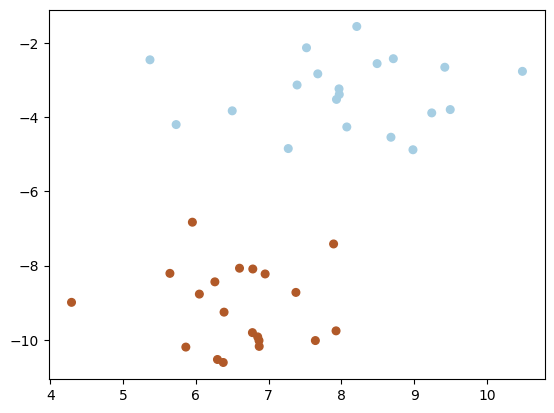

In [2]:
# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.show()

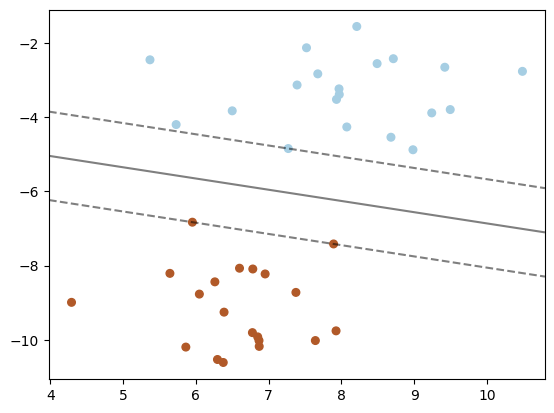

In [3]:
# fit the model
# We use differnet C values here for illustration purposes. 
clf = svm.SVC(kernel='linear', C=1000)   # large C means little to no regularization, default = 1.0
# clf = svm.SVC(kernel='linear', C=0.01)  # small C means regularization 

# clf = svm.SVC(kernel='rbf', gamma=0.1) # using a Gaussian kernel

clf.fit(X, y)

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot the decision function
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.show()

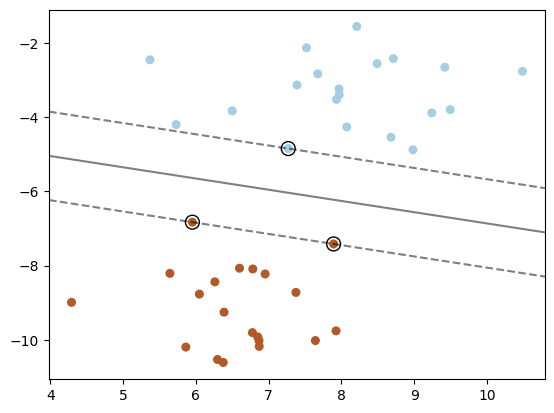

In [4]:
# plot the decision function
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()